In [2]:
import contextily
import geopandas
import rioxarray
import seaborn
import pandas 
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from pysal.lib import cg as geometry

In [3]:
from pysal.lib import weights

In [4]:
# Get points in a grid
l = numpy.arange(3)
xs, ys = numpy.meshgrid(l, l)
# Set up store
polys = []
# Generate polygons
for x, y in zip(xs.flatten(), ys.flatten()):
    poly = Polygon([(x, y), (x+1, y), (x+1, y+1), (x, y+1)])
    polys.append(poly)
# Convert to GeoSeries
polys = geopandas.GeoSeries(polys)
gdf = geopandas.GeoDataFrame(
    {
        'geometry': polys, 
        'id': ['P-%s'%str(i).zfill(2) for i in range(len(polys))]
    }
)

In [7]:
xs.flatten()

array([0, 1, 2, 0, 1, 2, 0, 1, 2])

In [12]:
gdf

,geometry,id
0,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",P-00
1,"POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....",P-01
2,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....",P-02
3,"POLYGON ((0.00000 1.00000, 1.00000 1.00000, 1....",P-03
4,"POLYGON ((1.00000 1.00000, 2.00000 1.00000, 2....",P-04
5,"POLYGON ((2.00000 1.00000, 3.00000 1.00000, 3....",P-05
6,"POLYGON ((0.00000 2.00000, 1.00000 2.00000, 1....",P-06
7,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2....",P-07
8,"POLYGON ((2.00000 2.00000, 3.00000 2.00000, 3....",P-08


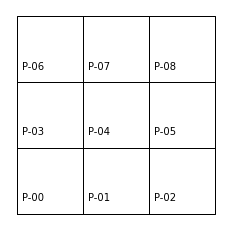

In [13]:
# Plot grid geotable
ax = gdf.plot(facecolor='w', edgecolor='k')

# Loop over each cell and add the text
for x, y, t in zip(
    [p.centroid.x-.25 for p in polys],
    [p.centroid.y-.25 for p in polys],
    [i for i in gdf['id']]
):
    plt.text(
        x, y, t, verticalalignment='center', horizontalalignment='center'
    )
    
# Remove axes
ax.set_axis_off()
plt.show()

In [14]:
wr = weights.contiguity.Rook.from_dataframe(gdf)

In [15]:
wr

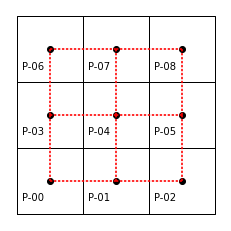

In [16]:
# Set up figure
f,ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal'))
# Plot grid
gdf.plot(facecolor='w', edgecolor='k', ax=ax)
# Loop over each cell and add the text
for x, y, t in zip(
    [p.centroid.x-.25 for p in polys],
    [p.centroid.y-.25 for p in polys],
    [i for i in gdf['id']]
):
    plt.text(
        x, y, t, verticalalignment='center', horizontalalignment='center'
    )
# Plot weights connectivity
wr.plot(gdf, edge_kws=dict(color='r', linestyle=':'), ax =ax)
# Remove axes
ax.set_axis_off()

In [17]:
wr.neighbors

{0: [1, 3],
 1: [0, 2, 4],
 2: [1, 5],
 3: [0, 4, 6],
 4: [1, 3, 5, 7],
 5: [8, 2, 4],
 6: [3, 7],
 7: [8, 4, 6],
 8: [5, 7]}

In [18]:
wr

In [19]:
pandas.DataFrame(*wr.full()).astype(int)

,0,1,2,3,4,5,6,7,8
0,0,1,0,1,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0
2,0,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,1,0,0
4,0,1,0,1,0,1,0,1,0
5,0,0,1,0,1,0,0,0,1
6,0,0,0,1,0,0,0,1,0
7,0,0,0,0,1,0,1,0,1
8,0,0,0,0,0,1,0,1,0


In [25]:
wr.nonzero

24

In [26]:
# Build a regular 3x3 lattice and draw it here
wq = weights.contiguity.Queen.from_dataframe(gdf)
wq.neighbors

{0: [1, 3, 4],
 1: [0, 2, 3, 4, 5],
 2: [1, 4, 5],
 3: [0, 1, 4, 6, 7],
 4: [0, 1, 2, 3, 5, 6, 7, 8],
 5: [1, 2, 4, 7, 8],
 6: [3, 4, 7],
 7: [3, 4, 5, 6, 8],
 8: [4, 5, 7]}

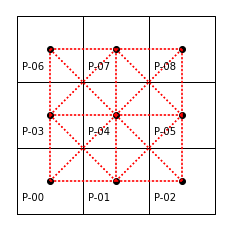

In [27]:
# Set up figure
f,ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal'))
# Plot grid
gdf.plot(facecolor='w', edgecolor='k', ax=ax)
# Loop over each cell and add the text
for x, y, t in zip(
    [p.centroid.x-.25 for p in polys],
    [p.centroid.y-.25 for p in polys],
    [i for i in gdf['id']]
):
    plt.text(
        x, y, t, verticalalignment='center', horizontalalignment='center'
    )
# Plot weights connectivity
wq.plot(gdf, edge_kws=dict(color='r', linestyle=':'), ax =ax)
# Remove axes
ax.set_axis_off()

In [28]:
wq.weights

{0: [1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0]}

In [29]:
wq.cardinalities

{0: 3, 1: 5, 2: 3, 3: 5, 4: 8, 5: 5, 6: 3, 7: 5, 8: 3}

In [30]:
wq.histogram

[(3, 4), (4, 0), (5, 4), (6, 0), (7, 0), (8, 1)]

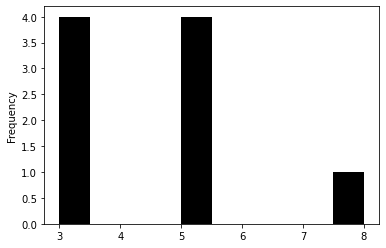

In [31]:
pandas.Series(wq.cardinalities).plot.hist(color='k');

In [32]:
wq.s0

40.0

In [33]:
wq.pct_nonzero

49.382716049382715

In [37]:
40/(9*9)

0.49382716049382713

In [38]:
san_diego_tracts = geopandas.read_file('sanDiego/sandiego_tracts.gpkg')
w_queen = weights.contiguity.Queen.from_dataframe(san_diego_tracts)

In [39]:
san_diego_tracts

,GEOID,median_age,total_pop,total_pop_white,tt_work,hh_total,hh_female,total_bachelor,median_hh_income,income_gini,...,state,county,tract,area_sqm,pct_rented,pct_hh_female,pct_bachelor,pct_white,sub_30,geometry
0,06073018300,37.1,2590.0,2375.0,1299.0,2590.0,137.0,0.0,62500.0,0.5355,...,06,073,018300,2.876449,0.373913,0.052896,0.000000,0.916988,False,"POLYGON ((-13069450.120 3922380.770, -13069175..."
1,06073018601,41.2,5147.0,4069.0,1970.0,5147.0,562.0,24.0,88165.0,0.4265,...,06,073,018601,4.548797,0.205144,0.109190,0.004663,0.790558,False,"POLYGON ((-13067719.770 3922939.420, -13067631..."
2,06073017601,54.4,5595.0,4925.0,1702.0,5595.0,442.0,34.0,110804.0,0.4985,...,06,073,017601,8.726275,0.279029,0.078999,0.006077,0.880250,False,"POLYGON ((-13058166.110 3907247.690, -13058140..."
3,06073019301,42.3,7026.0,5625.0,3390.0,7026.0,638.0,46.0,100539.0,0.4003,...,06,073,019301,3.519743,0.196512,0.090806,0.006547,0.800598,False,"POLYGON ((-13056896.290 3925255.610, -13056868..."
4,06073018700,21.8,40402.0,30455.0,24143.0,40402.0,2456.0,23.0,41709.0,0.3196,...,06,073,018700,559.150793,0.949887,0.060789,0.000569,0.753799,False,"POLYGON ((-13090788.510 3946435.430, -13090736..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,06073020709,41.6,7848.0,5633.0,3512.0,7848.0,808.0,88.0,95132.0,0.3628,...,06,073,020709,107.593049,0.127660,0.102956,0.011213,0.717762,False,"POLYGON ((-13029476.960 3912060.390, -13029476..."
624,06073020805,36.2,3624.0,2759.0,1681.0,3624.0,392.0,0.0,63820.0,0.3498,...,06,073,020805,7.239568,0.341730,0.108168,0.000000,0.761313,False,"POLYGON ((-13014919.160 3898901.850, -13014868..."
625,06073020810,44.5,5261.0,4977.0,2101.0,5261.0,617.0,26.0,106319.0,0.3336,...,06,073,020810,39.028783,0.111605,0.117278,0.004942,0.946018,False,"POLYGON ((-13009524.170 3896636.950, -13009524..."
626,06073021206,46.0,3065.0,2628.0,1373.0,3065.0,303.0,15.0,104375.0,0.4050,...,06,073,021206,42.849263,0.098882,0.098858,0.004894,0.857423,False,"POLYGON ((-13002757.840 3875229.320, -13002735..."


(-13040000.0, -13020000.0, 3850000.0, 3860000.0)

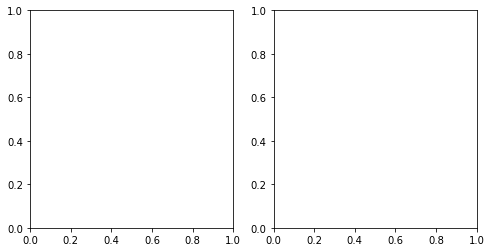

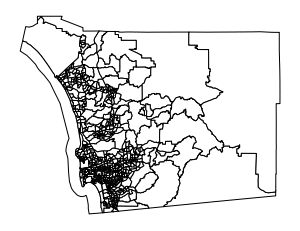

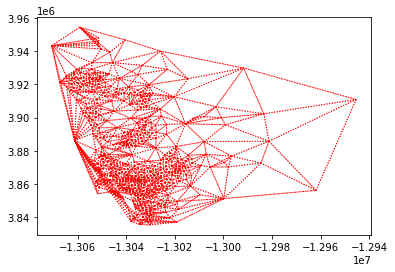

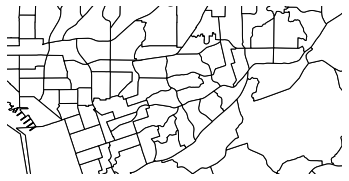

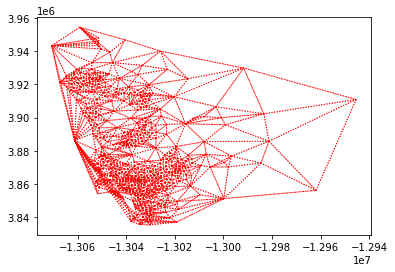

In [53]:
# Plot tract geography
f,ax = plt.subplots(1,2,figsize=(8,4))
for i in range(2):
    #ax = san_diego_tracts.plot(edgecolor='k', facecolor='w', ax=ax[i])
    ax = san_diego_tracts.plot(edgecolor='k', facecolor='w')
    # Plot graph connections
    w_queen.plot(
        san_diego_tracts, 
        #ax=ax[i], 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker='')
    )
# Remove the axis
    #ax[i].set_axis_off()
    ax.set_axis_off()
#ax[1].axis([-13040000,  -13020000, 3850000, 3860000])
ax.axis([-13040000,  -13020000, 3850000, 3860000])

In [54]:
print(w_queen.n)
print(w_queen.pct_nonzero)

628
1.018296888311899


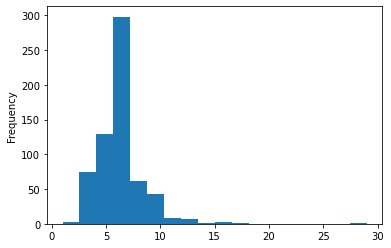

In [55]:
s = pandas.Series(w_queen.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

0.8722463385938578


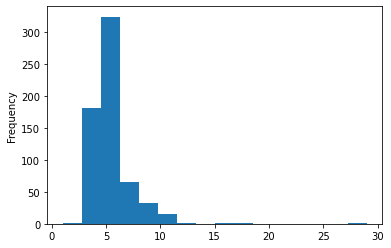

In [56]:
w_rook = weights.contiguity.Rook.from_dataframe(san_diego_tracts)
print(w_rook.pct_nonzero)
s = pandas.Series(w_rook.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

In [57]:
sao_paulo = rioxarray.open_rasterio("saoPaulo/ghsl_sao_paulo.tif")

In [58]:
sao_paulo

<xarray.DataArray (band: 1, y: 416, x: 468)>
[194688 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
  * y            (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
    spatial_ref  int32 0
Attributes:
    _FillValue:    -200.0
    scale_factor:  1.0
    add_offset:    0.0

In [59]:
w_sao_paulo = weights.contiguity.Queen.from_xarray(sao_paulo)

AttributeError: type object 'Queen' has no attribute 'from_xarray'

In [62]:
import pysal
print(pysal.__version__)

2.3.0


In [63]:
wk4 = weights.distance.KNN.from_dataframe(san_diego_tracts, k=4)

In [64]:
wk4

In [65]:
wk4.islands

[]

In [66]:
wk4.histogram

[(4, 628)]

In [70]:
wk4.weights

{0: [1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0],
 35: [1.0, 1.0, 1.0, 1.0],
 36: [1.0, 1.0, 1.0, 1.0],
 37: [1.0, 

In [71]:
w_kernel = weights.distance.Kernel.from_dataframe(gdf)

In [72]:
w_kernel.weights

{0: [1.0, 9.99999900663795e-08, 9.99999900663795e-08],
 1: [9.99999900663795e-08, 1.0, 9.99999900663795e-08, 9.99999900663795e-08],
 2: [9.99999900663795e-08, 1.0, 9.99999900663795e-08],
 3: [9.99999900663795e-08, 1.0, 9.99999900663795e-08, 9.99999900663795e-08],
 4: [9.99999900663795e-08,
  9.99999900663795e-08,
  1.0,
  9.99999900663795e-08,
  9.99999900663795e-08],
 5: [9.99999900663795e-08, 9.99999900663795e-08, 1.0, 9.99999900663795e-08],
 6: [9.99999900663795e-08, 1.0, 9.99999900663795e-08],
 7: [9.99999900663795e-08, 9.99999900663795e-08, 1.0, 9.99999900663795e-08],
 8: [9.99999900663795e-08, 9.99999900663795e-08, 1.0]}

In [73]:
w_kernel.function

'triangular'

In [74]:
# Show the first five values of bandwidths
w_kernel.bandwidth[0:5]

array([[1.0000001],
       [1.0000001],
       [1.0000001],
       [1.0000001],
       [1.0000001]])

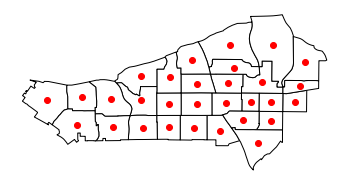

In [75]:
# Create subset of tracts
sub_30 = san_diego_tracts.query("sub_30 == True")
# Plot polygons
ax = sub_30.plot(facecolor='w', edgecolor='k')
# Create and plot centroids
sub_30.head(30).centroid.plot(color='r', ax=ax)
# Remove axis
ax.set_axis_off();

In [76]:
# Build weights with adaptive bandwidth
w_adaptive = weights.distance.Kernel.from_dataframe(
    sub_30,fixed=False, k=15
)
# Print first five bandwidth values
w_adaptive.bandwidth[:5]

array([[7065.74020822],
       [3577.22591841],
       [2989.74807871],
       [2891.46196945],
       [3965.08354232]])

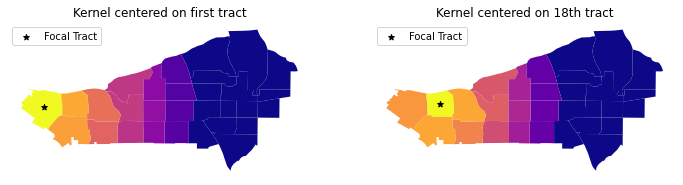

In [77]:
# Create full matrix version of weights
full_matrix, ids = w_adaptive.full()
# Set up figure with two subplots in a row
f,ax = plt.subplots(
    1, 2, figsize=(12,6), subplot_kw=dict(aspect='equal')
)
# Append weights for first polygon and plot on first subplot
sub_30.assign(
    weight_0 = full_matrix[0]
).plot("weight_0", cmap='plasma', ax=ax[0])
# Append weights for 18th polygon and plot on first subplot
sub_30.assign(
    weight_18 = full_matrix[17]
).plot("weight_18", cmap='plasma', ax=ax[1])
# Add centroid of focal tracts
sub_30.iloc[[0], :].centroid.plot(
    ax=ax[0], marker="*", color="k", label='Focal Tract'
)
sub_30.iloc[[17], :].centroid.plot(
    ax=ax[1], marker="*", color="k", label='Focal Tract'
)
# Add titles
ax[0].set_title("Kernel centered on first tract")
ax[1].set_title("Kernel centered on 18th tract")
# Remove axis
[ax_.set_axis_off() for ax_ in ax]
# Add legend
[ax_.legend(loc='upper left') for ax_ in ax];

In [78]:
w_kernel.pct_nonzero

40.74074074074074

In [79]:
w_bdb = weights.distance.DistanceBand.from_dataframe(
    gdf, 1.5, binary=True
)

In [81]:
w_bdb.weights

{0: [1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0]}

In [82]:
w_hy = weights.distance.DistanceBand.from_dataframe(
    gdf, 1.5, binary=False
)

C:\ProgramData\Anaconda3\envs\Geo\lib\site-packages\scipy\sparse\data.py:117: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)


In [83]:
w_hy.weights

{0: [1.0, 1.0, 0.7071067811865475],
 1: [1.0, 1.0, 0.7071067811865475, 1.0, 0.7071067811865475],
 2: [1.0, 0.7071067811865475, 1.0],
 3: [1.0, 0.7071067811865475, 1.0, 1.0, 0.7071067811865475],
 4: [0.7071067811865475,
  1.0,
  0.7071067811865475,
  1.0,
  1.0,
  0.7071067811865475,
  1.0,
  0.7071067811865475],
 5: [0.7071067811865475, 1.0, 1.0, 0.7071067811865475, 1.0],
 6: [1.0, 0.7071067811865475, 1.0],
 7: [0.7071067811865475, 1.0, 0.7071067811865475, 1.0, 1.0],
 8: [0.7071067811865475, 1.0, 1.0]}

In [84]:
wq.weights[4]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [85]:
w_hy.weights[4]

[0.7071067811865475,
 1.0,
 0.7071067811865475,
 1.0,
 1.0,
 0.7071067811865475,
 1.0,
 0.7071067811865475]

In [87]:
# ignore curvature of the earth
knn4_bad = weights.distance.KNN.from_shapefile(
    'texas/texas.shp', k=4
)

In [90]:
knn4_bad.weights

{0: [1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0],
 35: [1.0, 1.0, 1.0, 1.0],
 36: [1.0, 1.0, 1.0, 1.0],
 37: [1.0, 

In [91]:
radius = geometry.sphere.RADIUS_EARTH_MILES
radius

3958.755865744055

In [93]:
knn4 = weights.distance.KNN.from_shapefile(
    'texas/texas.shp', k=4, radius=radius
)

In [94]:
knn4[0]

{6: 1.0, 4: 1.0, 5: 1.0, 3: 1.0}

In [95]:
knn4_bad[0]

{6: 1.0, 4: 1.0, 5: 1.0, 13: 1.0}

In [96]:
san_diego_tracts[
    ['GEOID', 'state', 'county', 'tract']
].head()

,GEOID,state,county,tract
0,06073018300,06,073,018300
1,06073018601,06,073,018601
2,06073017601,06,073,017601
3,06073019301,06,073,019301
4,06073018700,06,073,018700


In [97]:
# NOTE: since this is a large dataset, it might take a while to process
w_bl = weights.util.block_weights(
    san_diego_tracts['county'].values, 
    ids=san_diego_tracts['GEOID'].values
)

In [98]:
'06073000201' in w_bl['06073000100']

True

In [100]:
disconnected_tract = san_diego_tracts.iloc[[103]]
disconnected_tract

,GEOID,median_age,total_pop,total_pop_white,tt_work,hh_total,hh_female,total_bachelor,median_hh_income,income_gini,...,state,county,tract,area_sqm,pct_rented,pct_hh_female,pct_bachelor,pct_white,sub_30,geometry
103,06073020019,52.6,6745.0,5545.0,3006.0,6745.0,633.0,186.0,52917.0,0.4684,...,06,073,020019,3.39755,0.230223,0.093847,0.027576,0.82209,False,"POLYGON ((-13050030.210 3912714.660, -13050026..."


In [101]:
w_queen[103]

{160: 1.0, 480: 1.0, 98: 1.0, 324: 1.0, 102: 1.0, 107: 1.0, 173: 1.0}

In [102]:
wk1 = weights.distance.KNN.from_dataframe(san_diego_tracts, k=1)

C:\ProgramData\Anaconda3\envs\Geo\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 153 disconnected components.
  warnings.warn(message)


In [106]:
wk1.neighbors

{0: [548],
 1: [386],
 2: [464],
 3: [312],
 4: [488],
 5: [235],
 6: [8],
 7: [95],
 8: [6],
 9: [11],
 10: [316],
 11: [555],
 12: [315],
 13: [102],
 14: [101],
 15: [13],
 16: [404],
 17: [163],
 18: [246],
 19: [406],
 20: [486],
 21: [162],
 22: [172],
 23: [252],
 24: [255],
 25: [175],
 26: [409],
 27: [91],
 28: [583],
 29: [181],
 30: [584],
 31: [580],
 32: [171],
 33: [263],
 34: [119],
 35: [187],
 36: [186],
 37: [590],
 38: [499],
 39: [590],
 40: [592],
 41: [192],
 42: [280],
 43: [599],
 44: [49],
 45: [124],
 46: [204],
 47: [513],
 48: [49],
 49: [44],
 50: [44],
 51: [351],
 52: [130],
 53: [360],
 54: [353],
 55: [361],
 56: [356],
 57: [358],
 58: [296],
 59: [296],
 60: [298],
 61: [62],
 62: [61],
 63: [60],
 64: [614],
 65: [531],
 66: [449],
 67: [449],
 68: [298],
 69: [616],
 70: [533],
 71: [72],
 72: [71],
 73: [371],
 74: [363],
 75: [535],
 76: [536],
 77: [138],
 78: [459],
 79: [80],
 80: [79],
 81: [547],
 82: [308],
 83: [462],
 84: [387],
 85: [550

In [107]:
wk1.histogram

[(1, 628)]

In [108]:
wk1.neighbors[103]

[102]

In [109]:
neighbors = w_rook.neighbors.copy()

In [110]:
neighbors[103].append(102)
neighbors[102].append(103)
w_new = weights.W(neighbors)
w_new[103]

{480: 1.0, 160: 1.0, 324: 1.0, 102: 1.0, 107: 1.0, 173: 1.0}

In [111]:
w_fixed_sets = weights.set_operations.w_union(w_rook, wk1)

In [112]:
w_fixed_sets[103]

{480: 1.0, 160: 1.0, 324: 1.0, 102: 1.0, 107: 1.0, 173: 1.0}

In [115]:
mx = geopandas.read_file('mexico/mexicojoin.shp')

In [116]:
mx_queen = weights.contiguity.Queen.from_dataframe(mx)

In [118]:
mx_knn4 = weights.KNN.from_dataframe(mx, k=4)

In [119]:
mx_bw = weights.util.block_weights(mx['INEGI2'].values)

C:\ProgramData\Anaconda3\envs\Geo\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


In [120]:
mx_union = weights.set_operations.w_union(mx_bw, mx_queen)

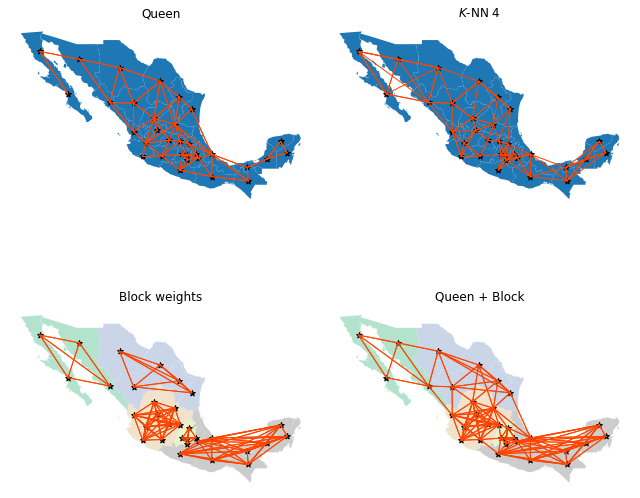

In [121]:
# Set up figure and axis
f, axs = plt.subplots(2, 2, figsize=(9, 9))

# Contiguity
ax = axs[0, 0]
mx.plot(ax=ax)
mx_queen.plot(
    mx, 
    edge_kws=dict(linewidth=1, color='orangered'), 
    node_kws=dict(marker='*'), 
    ax=ax
)
ax.set_axis_off()
ax.set_title('Queen')

# KNN
ax = axs[0, 1]
mx.plot(ax=ax)
mx_knn4.plot(
    mx, 
    edge_kws=dict(linewidth=1, color='orangered'), 
    node_kws=dict(marker='*'), 
    ax=ax
)
ax.set_axis_off()
ax.set_title('$K$-NN 4')

# Block
ax = axs[1, 0]
mx.plot(
    column='INEGI2', categorical=True, cmap='Pastel2', ax=ax
)
mx_bw.plot(
    mx, 
    edge_kws=dict(linewidth=1, color='orangered'), 
    node_kws=dict(marker='*'), 
    ax=ax
)
ax.set_axis_off()
ax.set_title('Block weights')

# Union
ax = axs[1, 1]
mx.plot(
    column='INEGI2', categorical=True, cmap='Pastel2', ax=ax
)
mx_union.plot(
    mx, 
    edge_kws=dict(linewidth=1, color='orangered'), 
    node_kws=dict(marker='*'), 
    ax=ax
)
ax.set_axis_off()
ax.set_title('Queen + Block')
f.tight_layout()
plt.show()

In [122]:
mx_bw.pct_nonzero

19.140625

In [123]:
mx_queen.pct_nonzero

13.4765625

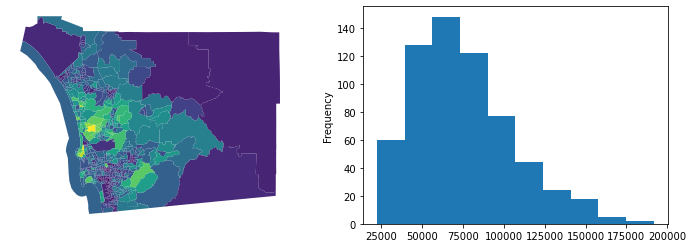

In [124]:
f,ax = plt.subplots(1,2, figsize=(12,4))
san_diego_tracts.plot('median_hh_income', ax=ax[0])
ax[0].set_axis_off()
san_diego_tracts['median_hh_income'].plot.hist(ax=ax[1])
plt.show()

In [125]:
adjlist = w_rook.to_adjlist() 
adjlist.head()

,focal,neighbor,weight
0,0,1,1.0
1,0,385,1.0
2,0,4,1.0
3,0,548,1.0
4,0,27,1.0


In [126]:
adjlist_income = adjlist.merge(
    san_diego_tracts[['median_hh_income']], 
    how='left', 
    left_on='focal', 
    right_index=True
).merge(
    san_diego_tracts[['median_hh_income']], 
    how='left',
    left_on='neighbor', 
    right_index=True, 
    suffixes=('_focal', '_neighbor')
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   focal                      3440 non-null   int64  
 1   neighbor                   3440 non-null   int64  
 2   weight                     3440 non-null   float64
 3   median_hh_income_focal     3440 non-null   float64
 4   median_hh_income_neighbor  3440 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 134.5 KB


In [129]:
adjlist_income

,focal,neighbor,weight,median_hh_income_focal,median_hh_income_neighbor,diff
0,0,1,1.0,62500.0,88165.000000,-25665.000000
1,0,385,1.0,62500.0,69665.000000,-7165.000000
2,0,4,1.0,62500.0,41709.000000,20791.000000
3,0,548,1.0,62500.0,45851.000000,16649.000000
4,0,27,1.0,62500.0,75402.798712,-12902.798712
...,...,...,...,...,...,...
3435,626,79,1.0,104375.0,62169.000000,42206.000000
3436,627,81,1.0,39760.0,95278.000000,-55518.000000
3437,627,145,1.0,39760.0,54866.000000,-15106.000000
3438,627,382,1.0,39760.0,38796.000000,964.000000


In [128]:
adjlist_income['diff'] = adjlist_income[
    'median_hh_income_focal'
] - adjlist_income[
    'median_hh_income_neighbor'
]

In [130]:
all_pairs = numpy.subtract.outer(
    san_diego_tracts['median_hh_income'].values, 
    san_diego_tracts['median_hh_income'].values
)

In [131]:
all_pairs

array([[     0., -25665., -48304., ..., -43819., -41875.,  22740.],
       [ 25665.,      0., -22639., ..., -18154., -16210.,  48405.],
       [ 48304.,  22639.,      0., ...,   4485.,   6429.,  71044.],
       ...,
       [ 43819.,  18154.,  -4485., ...,      0.,   1944.,  66559.],
       [ 41875.,  16210.,  -6429., ...,  -1944.,      0.,  64615.],
       [-22740., -48405., -71044., ..., -66559., -64615.,      0.]])

In [135]:
complement_wr = 1 - w_rook.sparse.toarray()
complement_wr

array([[1., 0., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [136]:
non_neighboring_diffs = (complement_wr * all_pairs).flatten()
non_neighboring_diffs

array([     0.,     -0., -48304., ..., -66559., -64615.,      0.])

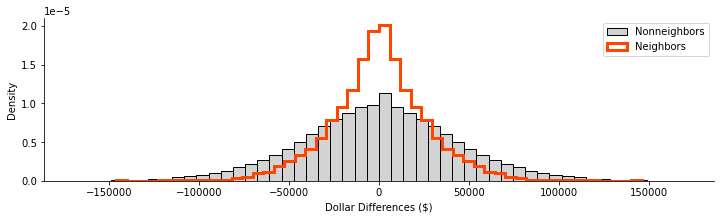

In [137]:
f = plt.figure(figsize=(12,3))
plt.hist(
    non_neighboring_diffs, 
    color='lightgrey', 
    edgecolor='k', 
    density=True, 
    bins=50, 
    label='Nonneighbors'
)
plt.hist(
    adjlist_income['diff'], 
    color='salmon', 
    edgecolor='orangered', 
    linewidth=3, 
    density=True, 
    histtype='step', 
    bins=50, 
    label='Neighbors'
)
seaborn.despine()
plt.ylabel("Density")
plt.xlabel("Dollar Differences ($)")
plt.legend();

In [138]:
extremes = adjlist_income.sort_values('diff', ascending=False).head()
extremes

,focal,neighbor,weight,median_hh_income_focal,median_hh_income_neighbor,diff
2605,473,163,1.0,183929.0,37863.0,146066.0
2609,473,157,1.0,183929.0,64688.0,119241.0
1886,343,510,1.0,151797.0,38125.0,113672.0
2610,473,238,1.0,183929.0,74485.0,109444.0
54,8,89,1.0,169821.0,66563.0,103258.0


In [139]:
## NOTE: this cell runs a simulation and may take a bit longer
## If you want it to run faster, decrease the number of shuffles
## by setting a lower value in `n_simulations`

# Set number or random shuffles
n_simulations = 1000
# Create an empty array to store results
simulated_diffs = numpy.empty((len(adjlist), n_simulations))
# Loop over each random draw
for i in range(n_simulations):
    # Extract income values
    median_hh_focal = adjlist_income['median_hh_income_focal'].values
    # Shuffle income values across locations
    random_income = san_diego_tracts[
        ['median_hh_income']
    ].sample(frac=1, replace=False).reset_index()
    # Join income to adjacency
    adjlist_random_income = adjlist.merge(
        random_income, left_on='focal', right_index=True
    ).merge(
        random_income, 
        left_on='neighbor', 
        right_index=True, 
        suffixes=('_focal','_neighbor')
    )
    # Store reslults from random draw
    simulated_diffs[:,i] = adjlist_random_income[
        'median_hh_income_focal'
    ] - adjlist_random_income[
        'median_hh_income_neighbor'
    ]

In [143]:
adjlist_random_income

,focal,neighbor,weight,index_focal,median_hh_income_focal,index_neighbor,median_hh_income_neighbor
0,0,1,1.0,519,77259.0,252,51327.0
25,4,1,1.0,248,191642.0,252,51327.0
495,84,1,1.0,379,101146.0,252,51327.0
1705,310,1,1.0,105,68665.0,252,51327.0
2126,386,1,1.0,604,62951.0,252,51327.0
...,...,...,...,...,...,...,...
2922,530,610,1.0,348,46771.0,97,106776.0
3316,606,610,1.0,444,54375.0,97,106776.0
3335,609,610,1.0,166,66212.0,97,106776.0
3347,611,610,1.0,286,42007.0,97,106776.0


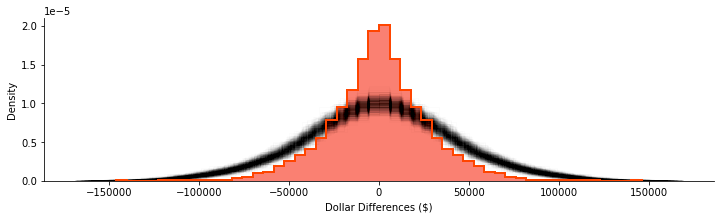

In [144]:
# Set up figure
f = plt.figure(figsize=(12,3))
# Build background histogram for observed differences
plt.hist(
    adjlist_income['diff'], 
    color='salmon', 
    bins=50, 
    density=True,
    alpha=1, 
    linewidth=4
)
# Plot simulated, random differences
[plt.hist(
    simulation, 
    histtype='step', 
    color='k', 
    alpha=.01, 
    linewidth=1, 
    bins=50, 
    density=True
) for simulation in simulated_diffs.T]
# Build histogram borderline for observed differences
plt.hist(
    adjlist_income['diff'], 
    histtype='step', 
    edgecolor='orangered', 
    bins=50, 
    density=True,
    linewidth=2
)
# Style figure
seaborn.despine()
plt.ylabel("Density")
plt.xlabel("Dollar Differences ($)")
plt.show()

In [145]:
simulated_diffs.flatten().shape

(3440000,)

In [146]:
# Convert all simulated differences into a single vector
pooled_diffs = simulated_diffs.flatten()
# Calculate the 0.5th, 50th and 99.5th percentiles 
lower, median, upper = numpy.percentile(pooled_diffs, q=(.5,50,99.5))
# Create a swith that is True if the value is "extreme" 
# (in the 0.5th percentile or/`|` in the 00.5th), False otherwise
outside = (
    adjlist_income['diff'] < lower
) | (
    adjlist_income['diff'] > upper
)

In [147]:
outside 

0       False
1       False
2       False
3       False
4       False
        ...  
3435    False
3436    False
3437    False
3438    False
3439    False
Name: diff, Length: 3440, dtype: bool

In [148]:
adjlist_income[outside]

,focal,neighbor,weight,median_hh_income_focal,median_hh_income_neighbor,diff
885,157,473,1.0,64688.0,183929.0,-119241.0
915,163,473,1.0,37863.0,183929.0,-146066.0
2605,473,163,1.0,183929.0,37863.0,146066.0
2609,473,157,1.0,183929.0,64688.0,119241.0


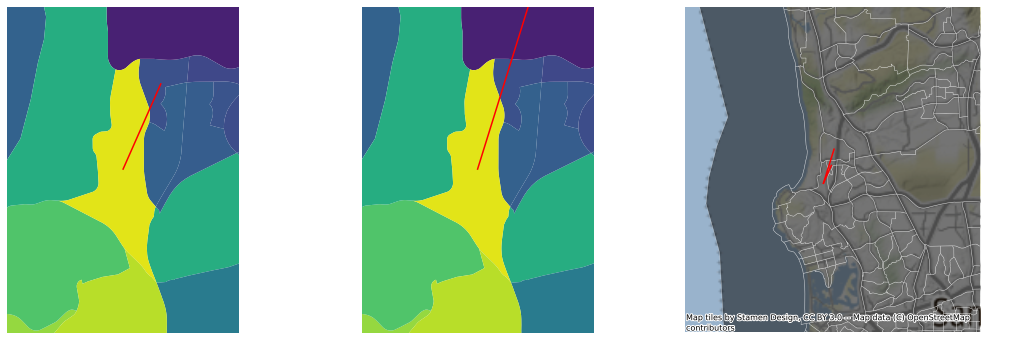

In [149]:
f,ax = plt.subplots(1, 3, figsize=(18,6))

# Plot tracts
for i in range(2):
    san_diego_tracts.plot('median_hh_income', ax=ax[i])

# Zoom 1
first_focus = san_diego_tracts.iloc[[473,157]]
ax[0].plot(first_focus.centroid.x, first_focus.centroid.y, color='red')
west,east,south,north = first_focus.buffer(1000).total_bounds
ax[0].axis([west, south, east, north])
ax[0].set_axis_off()

# Zoom 2
second_focus = san_diego_tracts.iloc[[473,163]]
ax[1].plot(second_focus.centroid.x, second_focus.centroid.y, color='red')
ax[1].axis([west, south, east, north])
ax[1].set_axis_off()

# Context
san_diego_tracts.plot(facecolor="k", edgecolor="w", linewidth=0.5, alpha=0.5, ax=ax[2])
contextily.add_basemap(ax[2], crs=san_diego_tracts.crs)
area_of_focus = pandas.concat((first_focus, second_focus)).buffer(12000).total_bounds
ax[2].plot(first_focus.centroid.x, first_focus.centroid.y, color='red')
ax[2].plot(second_focus.centroid.x, second_focus.centroid.y, color='red')
west, east, south, north = area_of_focus
ax[2].axis([west, south, east, north])
ax[2].set_axis_off()